Шепелев Д.

## **Загрузите файл classification.csv**

In [50]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('classification.csv')
df.head(3)

,true,pred
0,1,0
1,1,1
2,1,1


## **Заполните таблицу ошибок классификации**

In [25]:
TP = df.where(df['true'] == df['pred']).where(df['true'] == 1).dropna().shape[0]
TN = df.where(df['true'] == df['pred']).where(df['true'] == 0).dropna().shape[0]
FP = df.where(df['true'] != df['pred']).where(df['true'] == 1).dropna().shape[0]
FN = df.where(df['true'] != df['pred']).where(df['true'] == 0).dropna().shape[0]

In [21]:
confusion_matrix = pd.DataFrame([[TP, FP], [FN, TN]], 
                                columns=['Actual Positive', 
                                         'Actual Negative'], 
                                index=['Predicted Positive', 
                                       'Predicted Negative'])
confusion_matrix

,Actual Positive,Actual Negative
Predicted Positive,43,59
Predicted Negative,34,64


## **Посчитайте основные метрики качества классификатора**

In [27]:
accuracy = (TP + TN) / (TP + FP + TN + FN)
accuracy

0.535

In [32]:
precision = TP / (TP + FP)
round(precision, 4)

0.4216

In [34]:
recall = TP / (TP + FN)
round(recall, 4)

0.5584

In [37]:
f = 2 * (precision * recall) / (precision + recall)
round(f, 4)

0.4804

## **Загрузите файл scores.csv**

In [38]:
dfs = pd.read_csv('scores.csv')
dfs.head(3)

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000


## **Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца с ответами этого классификатора)**

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [45]:
true = dfs.true.to_numpy()
score_logreg = dfs.score_logreg.to_numpy()
score_svm = dfs.score_svm.to_numpy()
score_knn = dfs.score_knn.to_numpy()
score_tree = dfs.score_tree.to_numpy()

In [57]:
print("AUC ROC")
print(f"logreg: {roc_auc_score(true, score_logreg)}")
print(f"svm: {roc_auc_score(true, score_svm)}")
print(f"knn: {roc_auc_score(true, score_knn)}")
print(f"tree: {roc_auc_score(true, score_tree)}")

AUC ROC
logreg: 0.719187675070028
svm: 0.7086834733893557
knn: 0.6351540616246498
tree: 0.6919267707082833


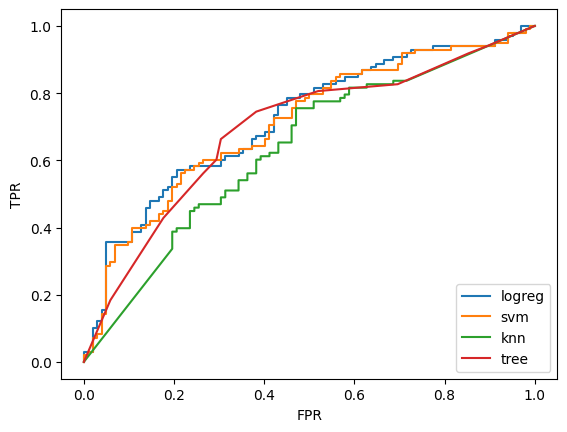

In [56]:
fpr, tpr, thresholds = roc_curve(true, score_logreg)
plt.plot(fpr, tpr, label="logreg")

fpr, tpr, thresholds = roc_curve(true, score_svm)
plt.plot(fpr, tpr, label="svm")

fpr, tpr, thresholds = roc_curve(true, score_knn)
plt.plot(fpr, tpr, label="knn")

fpr, tpr, thresholds = roc_curve(true, score_tree)
plt.plot(fpr, tpr, label="tree")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)

## **Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70%**

In [59]:
from sklearn.metrics import precision_recall_curve

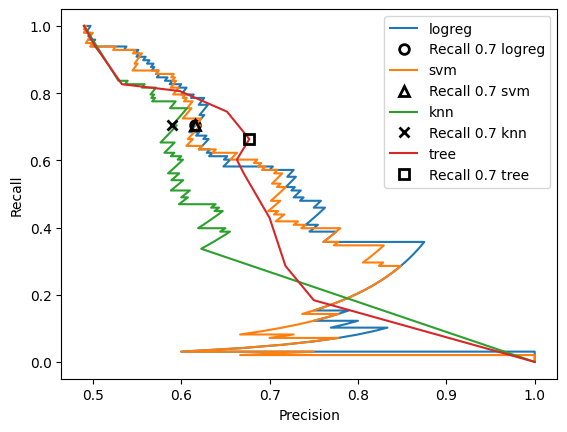

In [85]:
precision, recall, thresholds = precision_recall_curve(true, score_logreg)
plt.plot(precision, recall, label="logreg")

# через np.argmin(np.abs(recall - 0.7)) нахожу индекс рекол который соответсвует 70%
# затем беру тот же индекс в присижн
reacall_th_index = np.argmin(np.abs(recall - 0.7))
plt.plot(precision[reacall_th_index], 
         recall[reacall_th_index], 
         'o', 
         markersize=7, 
         label="Recall 0.7 logreg", 
         fillstyle="none", c='k', mew=2)
logreg_p = precision[reacall_th_index]


precision, recall, thresholds = precision_recall_curve(true, score_svm)
plt.plot(precision, recall, label="svm")

reacall_th_index = np.argmin(np.abs(recall-0.7))
plt.plot(precision[reacall_th_index], 
         recall[reacall_th_index], 
         '^', 
         markersize=7, 
         label="Recall 0.7 svm", 
         fillstyle="none", c='k', mew=2)
svm_p = precision[reacall_th_index]


precision, recall, thresholds = precision_recall_curve(true, score_knn)
plt.plot(precision, recall, label="knn")

reacall_th_index = np.argmin(np.abs(recall - 0.7))
plt.plot(precision[reacall_th_index], 
         recall[reacall_th_index], 
         'x', 
         markersize=7, 
         label="Recall 0.7 knn", 
         fillstyle="none", c='k', mew=2)
knn_p = precision[reacall_th_index]


precision, recall, thresholds = precision_recall_curve(true, score_tree)
plt.plot(precision, recall, label="tree")

reacall_th_index = np.argmin(np.abs(recall - 0.7))
plt.plot(precision[reacall_th_index], 
         recall[reacall_th_index], 
         's', 
         markersize=7, 
         label="Recall 0.7 tree", 
         fillstyle="none", c='k', mew=2)
tree_p = precision[reacall_th_index]


plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=1)

In [86]:
print("Precisions")
print(f"logreg: {logreg_p}")
print(f"svm: {svm_p}")
print(f"knn: {knn_p}")
print(f"tree: {tree_p}")

Precisions
logreg: 0.6160714285714286
svm: 0.6160714285714286
knn: 0.5897435897435898
tree: 0.6770833333333334
